# MS Movie Studio Project Notebook

## Data Understanding

#### Import Pandas, Matplotlib, SQLite, Seaborn and Numpy

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Connect to IMDB Database

In [2]:
conn = sqlite3.connect('zippedData/im.db')

#### Create IMDB tables listing for reference

In [3]:
imdb_tables = '''SELECT * FROM sqlite_master;'''

pd.read_sql_query(imdb_tables,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Storing Key IMDB Tables 

In [5]:
movie_basics = pd.read_sql_query(''' SELECT * FROM movie_basics''',conn)
movie_basics.to_csv()
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
movie_ratings = pd.read_sql_query(''' SELECT * FROM movie_ratings ''',conn)
movie_ratings.to_csv()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
movie_akas = pd.read_sql_query(''' SELECT * FROM movie_akas''',conn)
movie_akas.to_csv()
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [10]:
#Joining movie_ratings and movie_basics, and adding a column 'total_weight' as a measure of popularity

movies_agg = pd.read_sql_query('''
SELECT 
mr.movie_id
,mb.primary_title
,mb.original_title
,mb.genres
,mb.start_year
,averagerating
,numvotes
,(averagerating*numvotes) as total_weight

FROM movie_ratings mr
LEFT JOIN movie_basics mb
ON mr.movie_id = mb.movie_id

GROUP BY 1,2,3,4,5,6,7

ORDER BY total_weight DESC;

''',conn)

movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73052 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


#### Import movie budgets and gross sales data

In [11]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross.to_csv()
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.to_csv()
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Import additional tables (to be used if needed)

In [13]:
tmdb_data = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_data.to_csv()
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Data Wrangling

#### Create columns for gross and margin calculations within movie_budget df

In [15]:
##Converting dollar amounts from objects to floats
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))
movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: float(x.split('$')[1].replace(',','')))

##Total margin and gross calculations
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']
movie_budget['total_margin_$'] = movie_budget['total_gross'] - movie_budget['production_budget']
movie_budget['total_margin_%'] = (movie_budget['total_margin_$']/movie_budget['production_budget'])*100
movie_budget['domestic_margin_$'] = movie_budget['production_budget'] - movie_budget['domestic_gross']
movie_budget['domestic_margin_%'] = (movie_budget['domestic_margin_$']/movie_budget['production_budget'])*100                                                                                    

In [16]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.0+ KB


In [17]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,732.200683,-335507625.0,-78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,213.377435,169536125.0,41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,-44.992943,307237650.0,87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,463.224389,-128405868.0,-38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,511.010451,-303181382.0,-95.640815


#### What does the correlation between production budget and total margin look like?

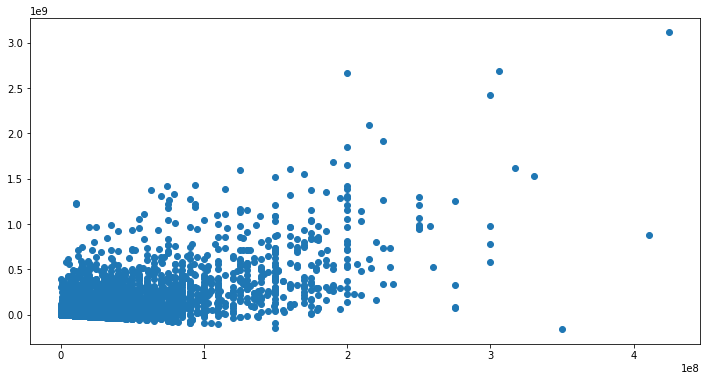

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
x = movie_budget['production_budget']
y = movie_budget['total_margin_$']


ax.scatter(x,y);

#### Observations: 
There is not much of a correlation. Very weak positive correlation, which tells me there are better factors that affect margins besides budget

#### What does the central tendency of movie budgets look like?

In [27]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5782.000000
mean,50.372363,31.587757,4.187333e+07,9.148746e+07,1.333608e+08,1.017730e+08,678.370158,-1.028557e+07,-198.354021
std,28.821076,41.812077,6.824060e+07,1.747200e+08,2.399411e+08,2.108880e+08,5492.209049,4.992137e+07,2608.659060
min,1.000000,0.001100,0.000000e+00,0.000000e+00,0.000000e+00,-1.574753e+08,-100.000000,-6.306622e+08,-179900.000000
25%,25.000000,5.000000,1.429534e+06,4.125415e+06,6.448924e+06,-3.098222e+05,-20.287843,-1.778144e+07,-105.814816
50%,50.000000,17.000000,1.722594e+07,2.798445e+07,4.605855e+07,2.499538e+07,165.931482,3.487755e+05,12.167378
75%,75.000000,40.000000,5.234866e+07,9.764584e+07,1.506937e+08,1.111648e+08,489.317031,9.132757e+06,79.436711
max,100.000000,425.000000,9.366622e+08,2.776345e+09,3.536853e+09,3.111853e+09,359900.000000,3.072376e+08,100.000000


In [26]:
# Make production_budget, domestic_gross, worldwide_gross, total_gross, total_margin_$ , domestic_margin_$
# into millions 

movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: x/1000000)

In [28]:
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: x/1000000)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: x/1000000)
movie_budget['total_gross'] = movie_budget['total_gross'].map(lambda x: x/1000000)
movie_budget['total_margin_$'] = movie_budget['total_margin_$'].map(lambda x: x/1000000)
movie_budget['domestic_margin_$'] = movie_budget['domestic_margin_$'].map(lambda x: x/1000000)

In [29]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,31.587757,41.873327,91.487461,133.360788,101.773031,678.370158,-10.285570,-198.354021
std,28.821076,41.812077,68.240597,174.719969,239.941100,210.887978,5492.209049,49.921366,2608.659060
min,1.000000,0.001100,0.000000,0.000000,0.000000,-157.475300,-100.000000,-630.662225,-179900.000000
25%,25.000000,5.000000,1.429534,4.125415,6.448924,-0.309822,-20.287843,-17.781444,-105.814816
50%,50.000000,17.000000,17.225945,27.984448,46.058546,24.995378,165.931482,0.348776,12.167378
75%,75.000000,40.000000,52.348662,97.645837,150.693737,111.164788,489.317031,9.132757,79.436711
max,100.000000,425.000000,936.662225,2776.345279,3536.852904,3111.852904,359900.000000,307.237650,100.000000


array([[<AxesSubplot:title={'center':'production_budget'}>]], dtype=object)

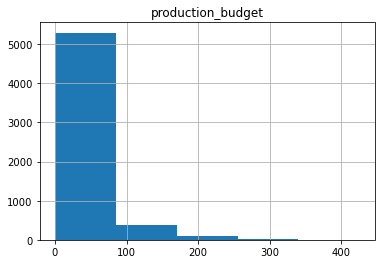

In [31]:
movie_budget.hist(column=['production_budget'],bins=5)

array([[<AxesSubplot:title={'center':'total_gross'}>]], dtype=object)

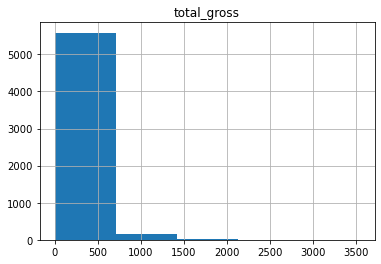

In [34]:
movie_budget.hist(column=['total_gross'],bins=5)

array([[<AxesSubplot:title={'center':'total_margin_%'}>]], dtype=object)

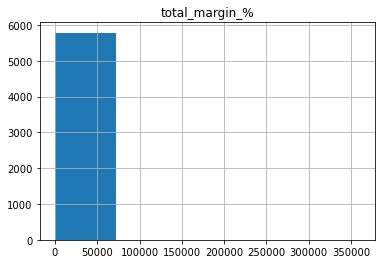

In [37]:
movie_budget.hist(column=['total_margin_%'],bins=5)

In [38]:
print("Median:", movie_budget['production_budget'].median(),movie_budget['total_gross'].median())

Median: 17.0 46.058546


#### Deep dive into genres

In [39]:
genres = pd.DataFrame(movies_agg['genres'].value_counts())

genres.head(10)

,genres
Drama,11612
Documentary,10313
Comedy,5613
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208
"Horror,Thriller",1004


In [40]:
movies_agg.isna().sum()

movie_id            0
primary_title       0
original_title      0
genres            804
start_year          0
averagerating       0
numvotes            0
total_weight        0
dtype: int64

In [42]:
# Replacing duplicates of the missing genres with "Unknown", since nulls represent ~%1 of the data.
# Won't drop them in case we need this data config later. 

movies_agg['genres'].fillna("Unkown",inplace=True)
movies_agg.isna().sum()

movie_id          0
primary_title     0
original_title    0
genres            0
start_year        0
averagerating     0
numvotes          0
total_weight      0
dtype: int64

#### Seperating out the genres into separate columns

In [43]:
movies_agg[['Genre_1','Genre_2','Genre_3']] = movies_agg['genres'].str.split(',',expand=True)
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,None
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,None
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,None
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi


In [44]:
# Filling Genre_2 and Genre_3 nulls with 'N/A since not all movies have multiple genres

movies_agg['Genre_2'].fillna('N/A',inplace=True)
movies_agg['Genre_3'].fillna('N/A',inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.2+ MB


### Combine movies_agg with movie_budgets

#### Cleaning titles for movie_agg for join

In [45]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [46]:
#Using original title because it joined more results than primary in draft notebook

movies_agg['clean_title'] = movies_agg['original_title'].apply(remove_punctuation)
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.lower())
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.replace(' ',''))
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama,thewolfofwallstreet
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,N/A,shutterisland
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy,guardiansofthegalaxy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy,deadpool
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi,madmaxfuryroad


In [50]:
#Concatenating year and title in case of title dupes

In [49]:
movies_agg['year_title'] = movies_agg['start_year'].astype(str) + movies_agg['clean_title']

In [51]:
movies_agg.nunique()

movie_id          73856
primary_title     69993
original_title    71097
genres              924
start_year           10
averagerating        91
numvotes           7349
total_weight      22449
Genre_1              26
Genre_2              26
Genre_3              22
clean_title       70804
year_title        73413
dtype: int64

In [52]:
# Dropping duplicate values using the year_title column 

movies_agg.dropna(subset=['year_title'],inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
 11  clean_title     73856 non-null  object 
 12  year_title      73856 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.9+ MB


In [53]:
# Looking at best column to join movie_budget 

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.0+ KB


In [55]:
#Cleaning Titles
movie_budget['clean_title'] = movie_budget['movie'].apply(remove_punctuation)
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.lower())
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.replace(' ',''))

In [56]:
# Making a column just for year
movie_budget['release_year'] = movie_budget['release_date'].map(lambda x: x.split(',')[1].strip() )

In [57]:
# Concatenate year_title
movie_budget['year_title'] = movie_budget['release_year'] + movie_budget['clean_title']

In [58]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
 11  clean_title        5782 non-null   object 
 12  release_year       5782 non-null   object 
 13  year_title         5782 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 632.5+ KB


In [59]:
movie_budget.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
total_gross          5363
total_margin_$       5497
total_margin_%       5402
domestic_margin_$    5345
domestic_margin_%    5216
clean_title          5698
release_year           96
year_title           5781
dtype: int64

In [66]:
genre_budgets = movie_budget.merge(movies_agg,how='left',left_on='clean_title',right_on='clean_title')
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 6344
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6345 non-null   int64  
 1   release_date       6345 non-null   object 
 2   movie              6345 non-null   object 
 3   production_budget  6345 non-null   float64
 4   domestic_gross     6345 non-null   float64
 5   worldwide_gross    6345 non-null   float64
 6   total_gross        6345 non-null   float64
 7   total_margin_$     6345 non-null   float64
 8   total_margin_%     6345 non-null   float64
 9   domestic_margin_$  6345 non-null   float64
 10  domestic_margin_%  6345 non-null   float64
 11  clean_title        6345 non-null   object 
 12  release_year       6345 non-null   object 
 13  year_title_x       6345 non-null   object 
 14  movie_id           2798 non-null   object 
 15  primary_title      2798 non-null   object 
 16  original_title     2798 

In [70]:
# Note: there are 2.8K movies from which we are assessing the normal profitability of genres
# Removing Null values that don't have any financial data 

genre_budgets.dropna(subset=['movie_id'],inplace=True)
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 1 to 6343
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2798 non-null   int64  
 1   release_date       2798 non-null   object 
 2   movie              2798 non-null   object 
 3   production_budget  2798 non-null   float64
 4   domestic_gross     2798 non-null   float64
 5   worldwide_gross    2798 non-null   float64
 6   total_gross        2798 non-null   float64
 7   total_margin_$     2798 non-null   float64
 8   total_margin_%     2798 non-null   float64
 9   domestic_margin_$  2798 non-null   float64
 10  domestic_margin_%  2798 non-null   float64
 11  clean_title        2798 non-null   object 
 12  release_year       2798 non-null   object 
 13  year_title_x       2798 non-null   object 
 14  movie_id           2798 non-null   object 
 15  primary_title      2798 non-null   object 
 16  original_title     2798 

### Start building genre_financials table

In [72]:
genre_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,start_year,averagerating,numvotes,total_weight
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2.798000e+03,2.798000e+03
mean,51.062902,34.351365,42.799779,102.850257,145.650036,111.298671,532.973216,-8.448414,-113.663339,2013.894210,6.236776,6.978876e+04,4.875572e+05
std,28.434414,47.369608,72.438042,195.021585,264.527641,230.412952,2313.778599,51.404923,814.770394,2.558761,1.196665,1.352773e+05,1.042142e+06
min,1.000000,0.001400,0.000000,0.000000,0.000000,-157.475300,-100.000000,-500.059566,-22664.410000,2010.000000,1.600000,5.000000e+00,1.400000e+01
25%,27.000000,5.000000,0.413046,2.344041,3.390907,-0.863642,-49.621579,-16.241233,-78.152683,2012.000000,5.600000,1.742500e+02,9.436250e+02
50%,51.000000,17.000000,16.208896,30.568731,47.112790,26.381137,146.696341,0.950000,27.264332,2014.000000,6.400000,1.188600e+04,7.005180e+04
75%,76.000000,40.000000,52.994344,103.171135,158.962565,119.065152,454.829442,10.027966,91.673100,2016.000000,7.100000,8.169975e+04,5.237915e+05
max,100.000000,410.600000,700.059566,2208.208395,2867.572339,2667.572339,64320.884000,307.237650,100.000000,2019.000000,9.400000,1.841066e+06,1.620138e+07


In [73]:
# Extra table for possible presentation visual: genre frequencies 

genre_table = pd.DataFrame(genre_budgets[['Genre_1','Genre_2','Genre_3']].apply(pd.Series.value_counts))
genre_table.fillna(0,inplace=True)
genre_table['total'] = genre_table['Genre_1'] + genre_table['Genre_2'] + genre_table['Genre_3']
genre_table

,Genre_1,Genre_2,Genre_3,total
Action,640.0,0.0,0.0,640.0
Adventure,225.0,236.0,0.0,461.0
Animation,23.0,94.0,18.0,135.0
Biography,169.0,29.0,4.0,202.0
Comedy,495.0,148.0,115.0,758.0
Crime,145.0,157.0,57.0,359.0
Documentary,158.0,32.0,11.0,201.0
Drama,632.0,564.0,197.0,1393.0
Family,16.0,66.0,67.0,149.0
Fantasy,11.0,70.0,98.0,179.0


In [75]:
## Checked central tendency grouping by genre1,2,3. Similar, so will use Genre_1 as proxy 

In [77]:
#Genre Margins
genre_margins = pd.DataFrame(pd.DataFrame(genre_budgets.groupby('Genre_1').mean())['total_margin_%'])
genre_margins.drop(index='Unkown',inplace=True)

#Genre Investments
genre_investments = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['production_budget'])
genre_investments.drop(index='Unkown',inplace=True)

#Genre Gross
genre_gross = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['total_gross'])
genre_gross.drop(index='Unkown',inplace=True)

#Combining them into new table genre_financials 
genre_financials = genre_margins.merge(genre_gross,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials = genre_financials.merge(genre_investments,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials

,total_margin_%,total_gross,production_budget
Genre_1,,,
Action,396.211478,253.380329,64.006219
Adventure,367.571404,329.519055,67.744996
Animation,617.507092,254.015867,46.403880
Biography,694.690946,100.277842,23.696777
Comedy,390.048273,89.465797,20.532247
Crime,358.655961,84.176106,22.052189
Documentary,425.078017,86.028972,23.260799
Drama,459.284215,70.056507,18.189847
Family,1105.607554,310.809300,28.636828


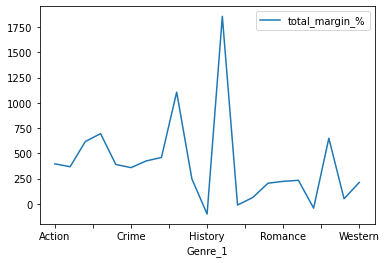

In [78]:
genre_financials.plot(y='total_margin_%');

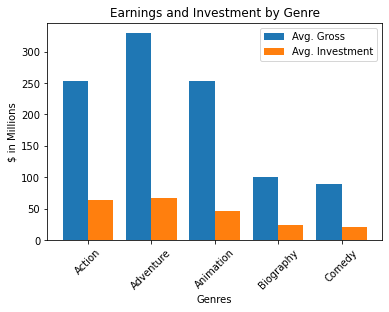

In [81]:
X = list(genre_financials.head(5).index)
Y = genre_financials.head(5)['total_gross']
Z = genre_financials.head(5)['production_budget']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Avg. Gross')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Avg. Investment')
  
plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("$ in Millions")
plt.title("Earnings and Investment by Genre")
plt.legend()
plt.show()

## Notes so far...

1. Movies make a lot more money if they are run internationally 
2. Want to focus on  Family/Animation, Horror Thriller, Bio + Doc to start
3. Skip on Action/Adventure due to high investment cost 

## Looking into international margins

In [82]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [83]:
# I will use this table to figure out if a movie is shown both domestically and internationally 

In [84]:
# check how many unique movies are in movie_akas

movie_akas.nunique()

movie_id             122302
ordering                 61
title                252781
region                  213
language                 76
types                    10
attributes               77
is_original_title         2
dtype: int64

In [85]:
# Determine how to filter for US and International
set(movie_akas['region'].unique())

{'AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BUMM',
 'BY',
 'BZ',
 'CA',
 'CD',
 'CF',
 'CG',
 'CH',
 'CI',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CSHH',
 'CSXX',
 'CU',
 'CV',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FO',
 'FR',
 'GA',
 'GB',
 'GE',
 'GH',
 'GL',
 'GM',
 'GP',
 'GR',
 'GT',
 'GU',
 'GW',
 'HK',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KN',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'MD',
 'ME',
 'MG',
 'MH',
 'MK',
 'ML',
 'MM',
 'MN',
 'MO',
 'MQ',
 'MR',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',
 'NC',
 'NE',
 'NG',
 'NI',
 'NL',
 'NO',
 'NP',


In [86]:
# Need to join movies_agg with movie_akas (changed with CASE WHEN to indicate international)

In [87]:
international_movies = pd.read_sql_query('''
WITH movies AS

(

SELECT  
movie_id
, title
, CASE WHEN region = 'US' THEN 'Domestic'
       WHEN region IS NULL THEN 'Unknown'
       ELSE 'International' END AS int_status

FROM movie_akas

)

, domestic AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE 
int_status = 'Domestic'
)

, international AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE
int_status = 'International'

)

SELECT DISTINCT 
movie_id

FROM domestic

WHERE movie_id in (SELECT DISTINCT movie_id FROM international)

''',conn)

international_movies

,movie_id
0,tt0369610
1,tt0401729
2,tt1014759
3,tt10446418
4,tt1182315
...,...
10851,tt9310460
10852,tt9358044
10853,tt9562694
10854,tt9705860


In [94]:
int_ids = set(international_movies['movie_id'])
int_ids

{'tt2924442',
 'tt4162992',
 'tt2113007',
 'tt4498298',
 'tt8688024',
 'tt1990216',
 'tt7139936',
 'tt5343040',
 'tt4180650',
 'tt5740806',
 'tt1659343',
 'tt7681824',
 'tt6104206',
 'tt1002563',
 'tt6474040',
 'tt1828222',
 'tt2543702',
 'tt3063470',
 'tt2140315',
 'tt4779026',
 'tt5664636',
 'tt3628584',
 'tt4717208',
 'tt6938828',
 'tt7216068',
 'tt6915100',
 'tt3680820',
 'tt3813310',
 'tt1607583',
 'tt8820590',
 'tt7958736',
 'tt3429498',
 'tt1398999',
 'tt1977895',
 'tt3276924',
 'tt1457765',
 'tt0498381',
 'tt3500724',
 'tt7317324',
 'tt5635006',
 'tt4946748',
 'tt4777008',
 'tt1686330',
 'tt1540814',
 'tt5228262',
 'tt3280262',
 'tt1634822',
 'tt3395582',
 'tt1259521',
 'tt1217209',
 'tt4503906',
 'tt5643724',
 'tt2274172',
 'tt2359347',
 'tt3721256',
 'tt8022710',
 'tt4159182',
 'tt2312890',
 'tt2084989',
 'tt2002718',
 'tt2911666',
 'tt6177424',
 'tt1308754',
 'tt4481340',
 'tt2795078',
 'tt6710658',
 'tt2137184',
 'tt2978426',
 'tt1851871',
 'tt0817177',
 'tt2150478',
 'tt17

In [88]:
# We found 10.8K movies that were shown both in the US and at least one region outside of the US

#### Begin merging international movies to movies agg

In [90]:
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
 11  clean_title     73856 non-null  object 
 12  year_title      73856 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.9+ MB


In [96]:
movies_agg['movie_id'][0] in int_ids

True

In [97]:
# Similar to below, we can check if movie id is in movies_agg and add a new column


movies_agg['is_international'] = movies_agg['movie_id'].map(lambda x: x in int_ids)
movies_agg.head()

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,year_title,is_international
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,2010inception,True
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises,True
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,2014interstellar,True
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,2012djangounchained,True
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,2012theavengers,True


In [98]:

int_genres = pd.DataFrame(movies_agg[movies_agg['is_international']==True])

int_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10233 entries, 0 to 73786
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          10233 non-null  object 
 1   primary_title     10233 non-null  object 
 2   original_title    10233 non-null  object 
 3   genres            10233 non-null  object 
 4   start_year        10233 non-null  int64  
 5   averagerating     10233 non-null  float64
 6   numvotes          10233 non-null  int64  
 7   total_weight      10233 non-null  float64
 8   Genre_1           10233 non-null  object 
 9   Genre_2           10233 non-null  object 
 10  Genre_3           10233 non-null  object 
 11  clean_title       10233 non-null  object 
 12  year_title        10233 non-null  object 
 13  is_international  10233 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [99]:
## Use above data to create visualization about popularity of genres internationally 

In [100]:
# Adjust total_weight to be more digestible
# NICE TO HAVE - put them all in the same scale 

int_genres['total_weight_adj'] = int_genres['total_weight'].map(lambda x: x/1000)

In [101]:
int_genres_weight = pd.DataFrame(int_genres.groupby(by='genres').sum().sort_values(by='total_weight_adj',ascending=False))

In [102]:
int_genres_weight

,start_year,averagerating,numvotes,total_weight,is_international,total_weight_adj
genres,,,,,,
"Action,Adventure,Sci-Fi",163206,476.0,22877297,166630322.1,81,166630.3221
"Action,Adventure,Fantasy",124909,344.5,9611647,64182838.8,62,64182.8388
"Adventure,Animation,Comedy",269934,811.9,8559129,61369240.4,134,61369.2404
"Action,Adventure,Comedy",189400,486.2,7102910,51624705.5,94,51624.7055
"Comedy,Drama,Romance",567891,1705.0,6583516,44895791.2,282,44895.7912
...,...,...,...,...,...,...
"Animation,Drama,Music",2019,6.7,7,46.9,1,0.0469
"Adventure,Family,Horror",2011,4.8,9,43.2,1,0.0432
"Adventure,Documentary,Music",2016,8.0,5,40.0,1,0.0400


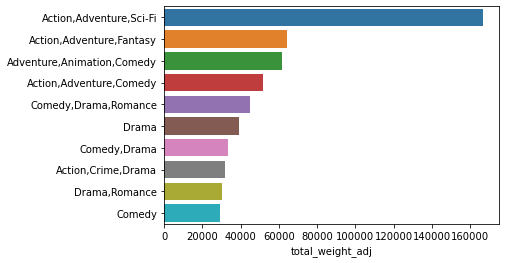

In [103]:
# Visualization of popular genres internationally

sns.barplot(x=int_genres_weight['total_weight_adj'].head(10),y=int_genres_weight.head(10).index.values,orient='h');

<AxesSubplot:xlabel='total_weight_adj', ylabel='Count'>

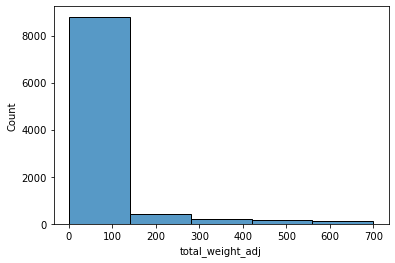

In [104]:
sns.histplot(x=int_genres['total_weight_adj'],bins=5,binrange=(0,700))

In [106]:
#### Finding examples of movies that had negative margins domestically, but positive total

In [105]:
example_movies = pd.DataFrame(movie_budget[['movie','production_budget','domestic_margin_$','domestic_margin_%','total_margin_$','total_margin_%']].head(10))

example_movies.iloc[[0,3,4,5,6,7]]

,movie,production_budget,domestic_margin_$,domestic_margin_%,total_margin_$,total_margin_%
0,Avatar,425.0,-335.507625,-78.942971,3111.852904,732.200683
3,Avengers: Age of Ultron,330.6,-128.405868,-38.840250,1531.419831,463.224389
4,Star Wars Ep. VIII: The Last Jedi,317.0,-303.181382,-95.640815,1619.903129,511.010451
5,Star Wars Ep. VII: The Force Awakens,306.0,-630.662225,-206.098766,2683.973445,877.115505
6,Avengers: Infinity War,300.0,-378.815482,-126.271827,2426.949682,808.983227
7,Pirates of the Caribbean: At Worldâs End,300.0,-9.420425,-3.140142,972.840850,324.280283


### Observations so far
